# Capstone 1: Data Story

Note: Due to the exploratory nature of this section, a majority of the graphs are not finished to publishing standards, and were run as purely an investigation. Those that were reported on have been more fully developed.

## Re-encode the dataset, as per the last section

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import in data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv'

base = pd.read_csv(url)

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [4]:
#change the columns with numeric values to numeric (specifically Age,
# HoursPerWeek, and TotalHours)
base['Age']=pd.to_numeric(base['Age'], errors = 'coerce')
base['HoursPerWeek']=pd.to_numeric(base['HoursPerWeek'], errors = 'coerce')
base['TotalHours']=pd.to_numeric(base['TotalHours'], errors = 'coerce')

In [5]:
#Create the base set 2 (without pros and NAs and outliers)
base2 = base.dropna(axis=0)
#remove TotalHours outlier
base2 = base2.set_index('TotalHours')
base2 = base2.drop(1000000, axis=0)
base2 = base2.reset_index()
#remove Gap Betweeb PACs outlier
base2 = base2.set_index('GapBetweenPACs')
base2 = base2.drop(237.142900, axis=0)
base2 = base2.reset_index()

In [6]:
#Create the pro data set
pro_base = base[base['LeagueIndex']==8]
pro_base = pro_base.set_index('TotalHours')
pro_base = pro_base.reset_index()
pro_base = pro_base.set_index('GapBetweenPACs')
pro_base = pro_base.reset_index()

In [7]:
#create pro base + base2, cleaned
base3 = base.set_index('TotalHours')
base3 = base3.drop(1000000, axis=0)
base3 = base3.reset_index()
#remove Gap Betweeb PACs outlier
base3 = base3.set_index('GapBetweenPACs')
base3 = base3.drop(237.142900, axis=0)
base3 = base3.reset_index()

## Let's look at some correlations, with scatterplots

In [8]:
#build the correlation matrix
corr = base2.corr()

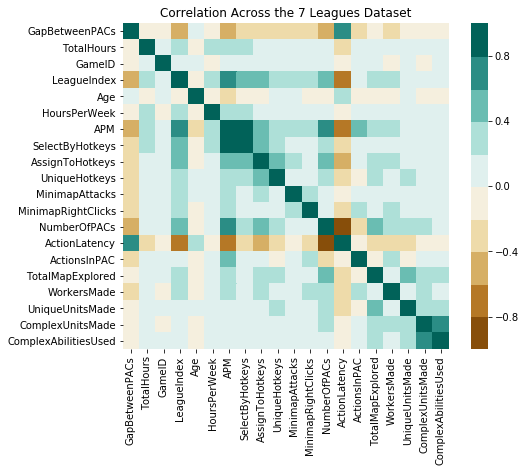

In [9]:
#graph the correlation matrix
corr_graph = sns.heatmap(corr,
                        vmin=-1,
                        vmax=1,
                        center=0,
                        cmap=sns.color_palette("BrBG",10),
                        square=True)
corr_graph = plt.title('Correlation Across the 7 Leagues Dataset')

From above, will investigate those with higher correlation.

#### Gap Between PACs vs. APM

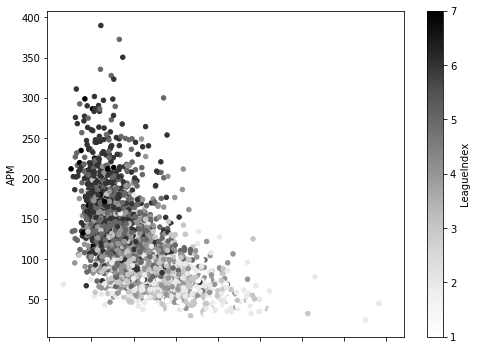

In [10]:
base2.plot(kind='scatter', x='GapBetweenPACs', y='APM', c='LeagueIndex')

#### Gap Between PACs vs. Number of PACs

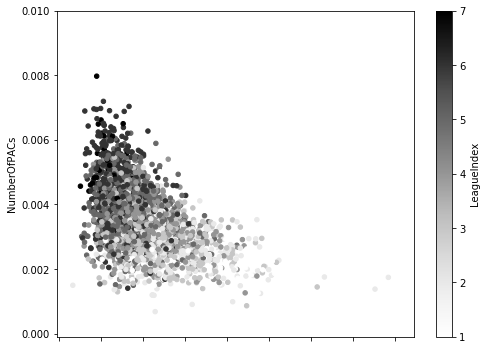

In [11]:
base2.plot(kind='scatter', x='GapBetweenPACs', y='NumberOfPACs', c='LeagueIndex',
          ylim = (-0.0001, 0.01))

##### Gap Between PACs vs. Action Latency

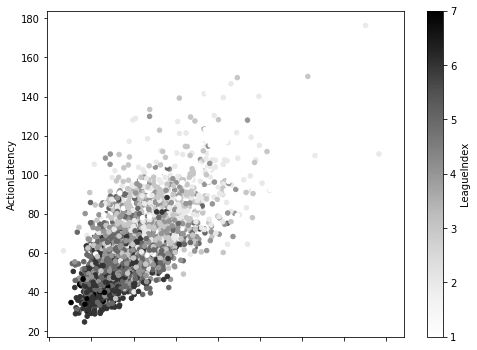

In [12]:
base2.plot(kind='scatter', x='GapBetweenPACs', y='ActionLatency', c='LeagueIndex')

#### APM vs. Select By Hotkeys

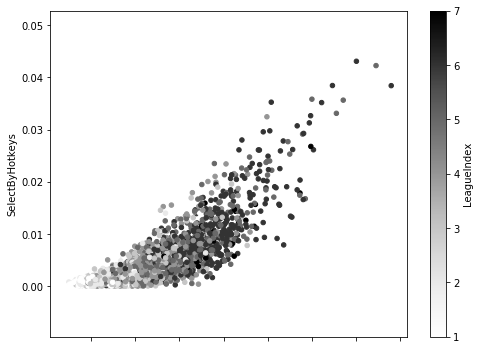

In [13]:
base2.plot(kind='scatter', x='APM', y='SelectByHotkeys', c='LeagueIndex')

#### APM vs. Number of PACs

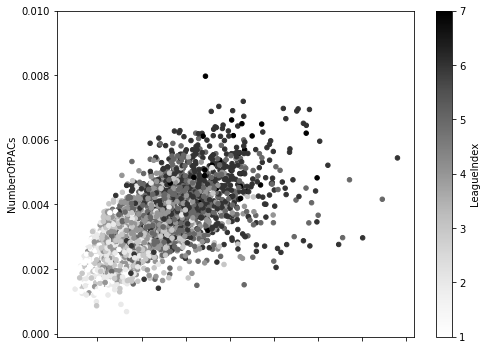

In [14]:
base2.plot(kind='scatter', x='APM', y='NumberOfPACs', c='LeagueIndex',
          ylim = (-0.0001,0.01))

#### APM vs. Action Latency

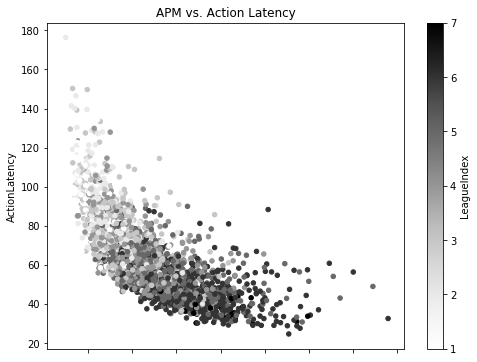

In [15]:
base2.plot(kind='scatter', x='APM', y='ActionLatency', c='LeagueIndex',
          title = 'APM vs. Action Latency')

#### Assign to Hotkeys vs. Action Latency

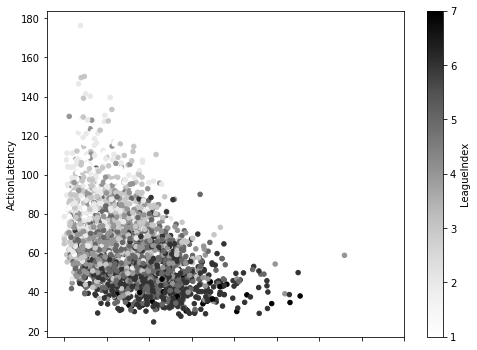

In [16]:
base2.plot(kind='scatter', x='AssignToHotkeys', y='ActionLatency',
           c='LeagueIndex',
          xlim=(-0.0001, 0.002))

#### Number of PACs vs. Action Latency

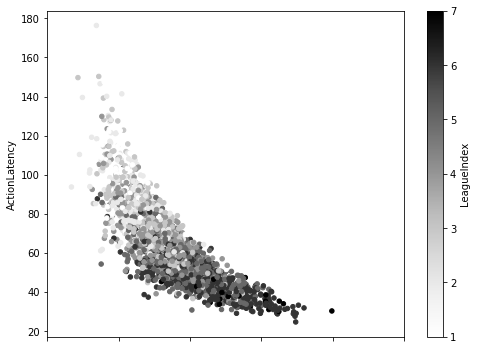

In [17]:
base2.plot(kind='scatter', x='NumberOfPACs', y='ActionLatency',
           c='LeagueIndex',
          xlim = (0, 0.01))

#### Complex Units Made vs. Complex Abilities Used

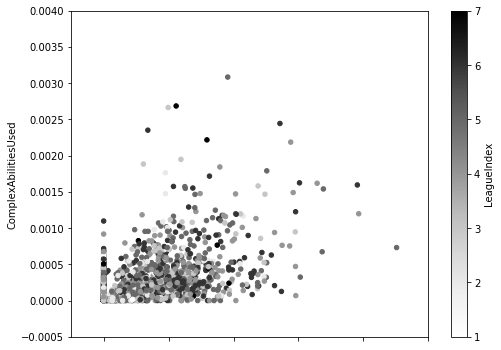

In [18]:
base2.plot(kind='scatter', x='ComplexUnitsMade', y='ComplexAbilitiesUsed',
           c='LeagueIndex',
          ylim = (-0.0005, 0.004), xlim = (-0.0001,0.001))

### Again from the correlation, look at correlations specificially having to do with League Index

Specifcally, let's investigate the relationship between League Index and APM, Action Latency and Gap Between PACs

#### League Index vs. APM

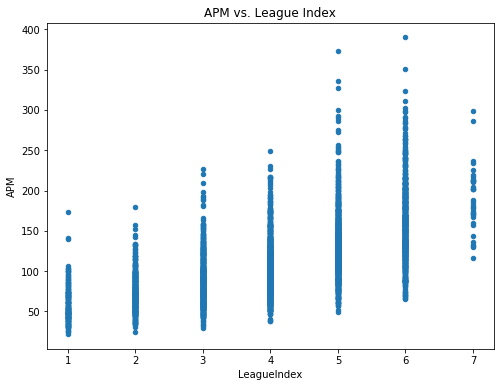

In [19]:
base2.plot(kind='scatter', x='LeagueIndex', y='APM', 
           title='APM vs. League Index')

#### League Index vs. Action Latency

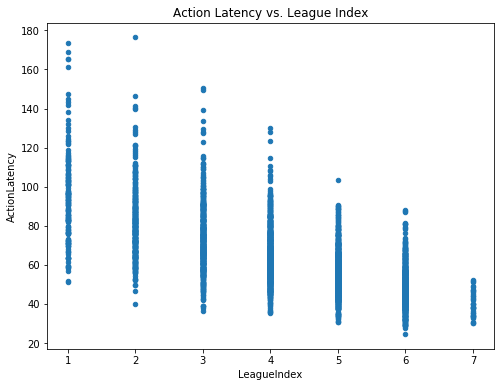

In [20]:
base2.plot(kind='scatter', x='LeagueIndex', y='ActionLatency', 
           title='Action Latency vs. League Index')

#### League Index vs. Gap Between PACs

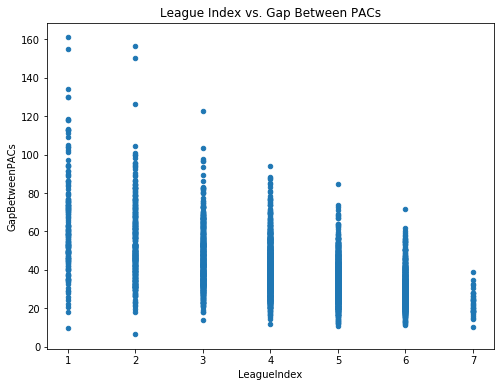

In [21]:
base2.plot(kind='scatter', x='LeagueIndex', y='GapBetweenPACs',
          title='League Index vs. Gap Between PACs')

## Let's Look at the Pros

#### Correlation of the pros

In [22]:
#Build the correlation matrix
corr_pro = pro_base.corr()

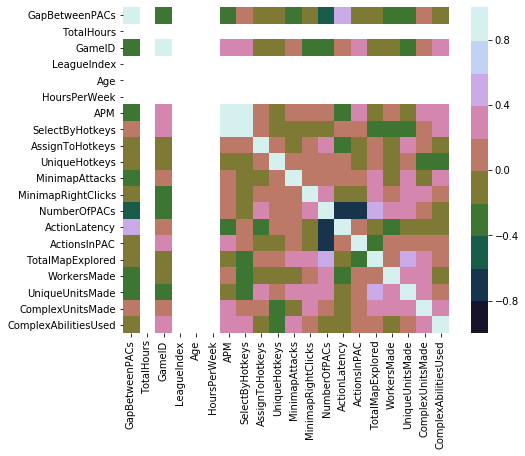

In [23]:
#graph the correlation matrix
corr_graph_pro = sns.heatmap(corr_pro,
                        vmin=-1,
                        vmax=1,
                        center=0,
                        cmap=sns.color_palette("cubehelix",10),
                        square=True)

Note that in the smaller pro dataset, there are much fewer correlations that have any significance

#### APM vs. Select By Hotkeys

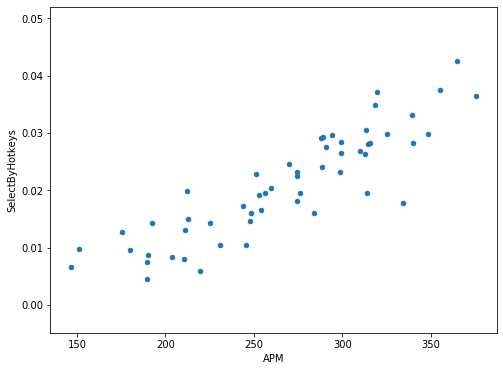

In [24]:
pro_base.plot(kind='scatter', x='APM', y='SelectByHotkeys')

#### Number of PACs vs. Action Latency

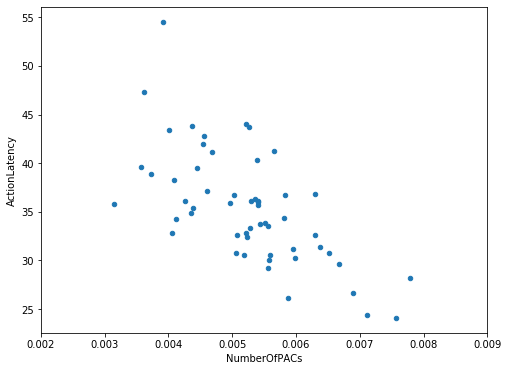

In [25]:
pro_base.plot(kind='scatter', x='NumberOfPACs', y='ActionLatency',
          xlim = (0.002, 0.009))

#### Number of PACs vs. Actions in PAC

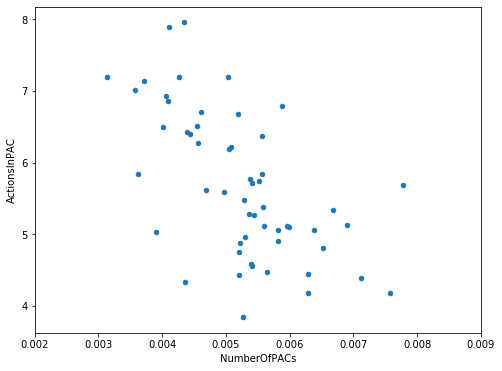

In [26]:
pro_base.plot(kind='scatter', x='NumberOfPACs', y='ActionsInPAC',
          xlim = (0.002, 0.009))

## Keeping the Pros to Look at Correlations

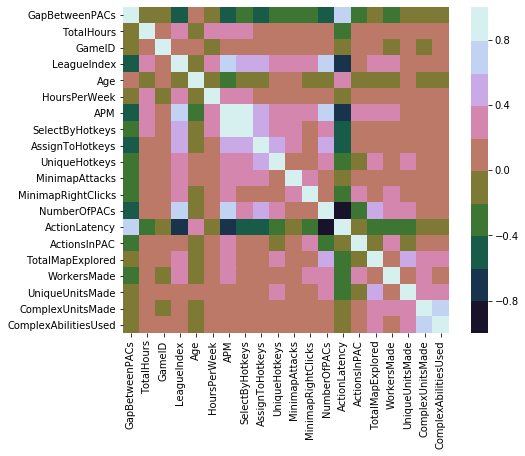

In [28]:
corr_all = base3.corr()
corr_plot_all = sns.heatmap(corr_all,
                        vmin=-1,
                        vmax=1,
                        center=0,
                        cmap=sns.color_palette("cubehelix",10),
                        square=True)

#### League Index vs. Gap Between PACs

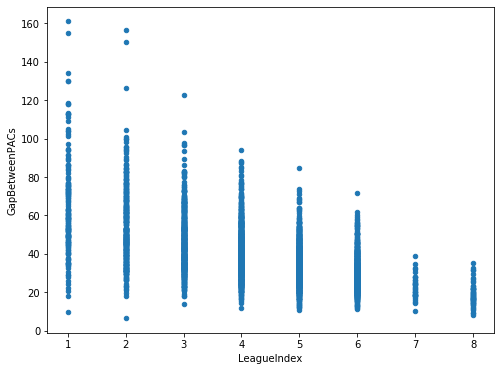

In [29]:
base3.plot(kind='scatter', x='LeagueIndex', y='GapBetweenPACs')

#### League Index vs. APM

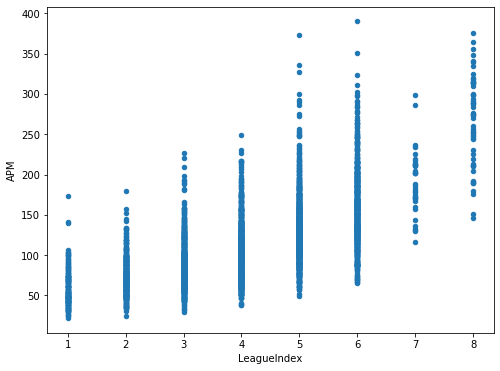

In [30]:
base3.plot(kind='scatter', x='LeagueIndex', y='APM')

#### League Index vs. Number of PACs

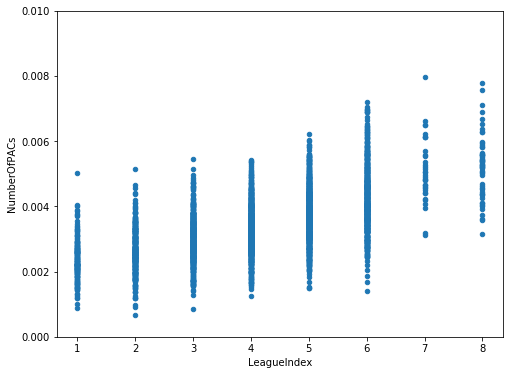

In [31]:
base3.plot(kind='scatter', x='LeagueIndex', y='NumberOfPACs',
          ylim = (0,0.01))

#### League Index vs. Action Latency

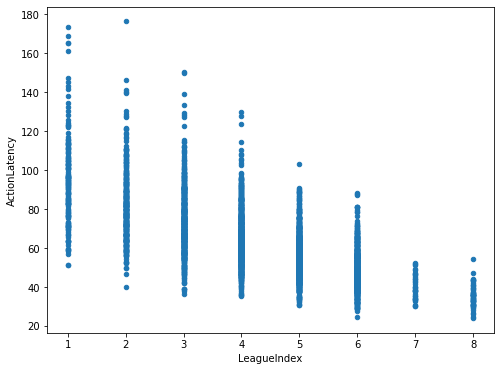

In [32]:
base3.plot(kind='scatter', x='LeagueIndex', y='ActionLatency')

## What if we only have the leagues with large populations from the study (drop LeagueIndex 7 and 8)

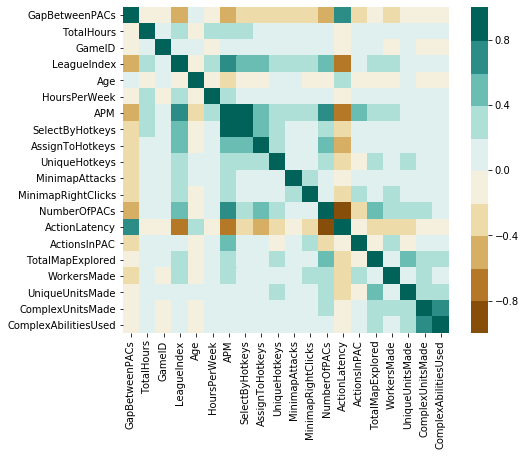

In [33]:
#Create a subset of the data
base4 = base3[base3['LeagueIndex']<7]
corr_base4 = base4.corr()
corr_base4_graph = sns.heatmap(corr_base4,
                              vmin=-1,
                        vmax=1,
                        center=0,
                        cmap=sns.color_palette("BrBG",10),
                        square=True)

#### Action Latency vs League Index

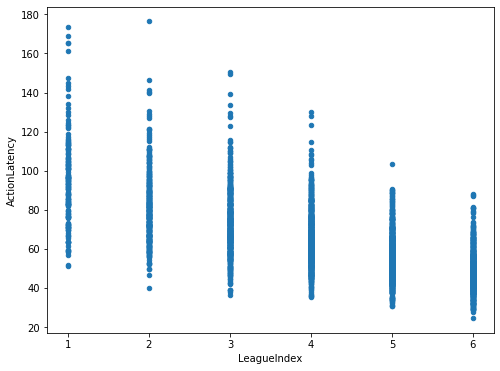

In [34]:
base4.plot(kind='scatter', x='LeagueIndex', y='ActionLatency')

#### Action Latency vs. APM

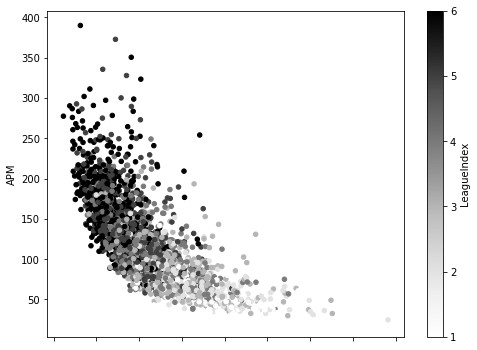

In [35]:
base4.plot(kind='scatter', x='ActionLatency', y='APM', c='LeagueIndex')

#### Action Latency vs. Number of PACs

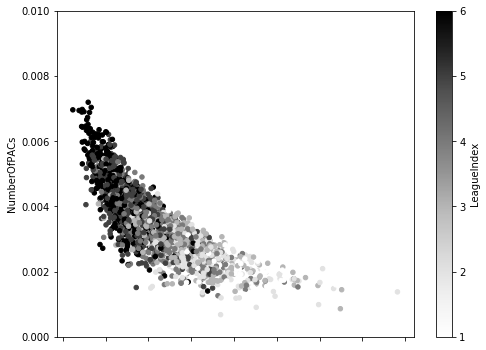

In [36]:
base4.plot(kind='scatter', x='ActionLatency', y='NumberOfPACs',
           c='LeagueIndex',
          ylim = (0,0.01))

#### Complex Units Made vs Complex Abilities Used

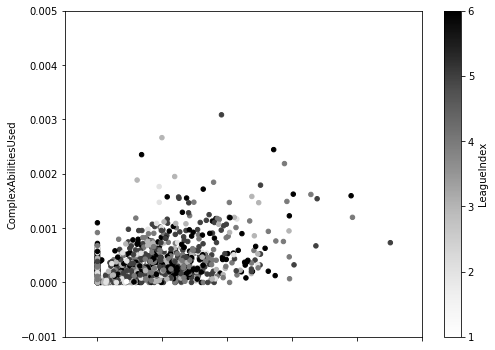

In [37]:
base4.plot(kind='scatter', x='ComplexUnitsMade', y='ComplexAbilitiesUsed',\
           c='LeagueIndex',
          xlim = (-0.0001,0.001),
          ylim = (-0.001,0.005))

#### APM vs. Select Hotkeys

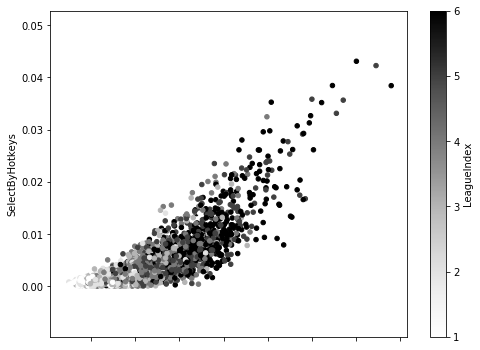

In [38]:
base4.plot(kind='scatter', x='APM', y='SelectByHotkeys', c='LeagueIndex')

### Look at the Correlations League by League

In [39]:
#Build all 8 correlations
corr_league_1 = base2[base2['LeagueIndex']==1].corr()
corr_league_2 = base2[base2['LeagueIndex']==2].corr()
corr_league_3 = base2[base2['LeagueIndex']==3].corr()
corr_league_4 = base2[base2['LeagueIndex']==4].corr()
corr_league_5 = base2[base2['LeagueIndex']==5].corr()
corr_league_6 = base2[base2['LeagueIndex']==6].corr()
corr_league_7 = base2[base2['LeagueIndex']==7].corr()
corr_league_8 = pro_base.corr()

In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size

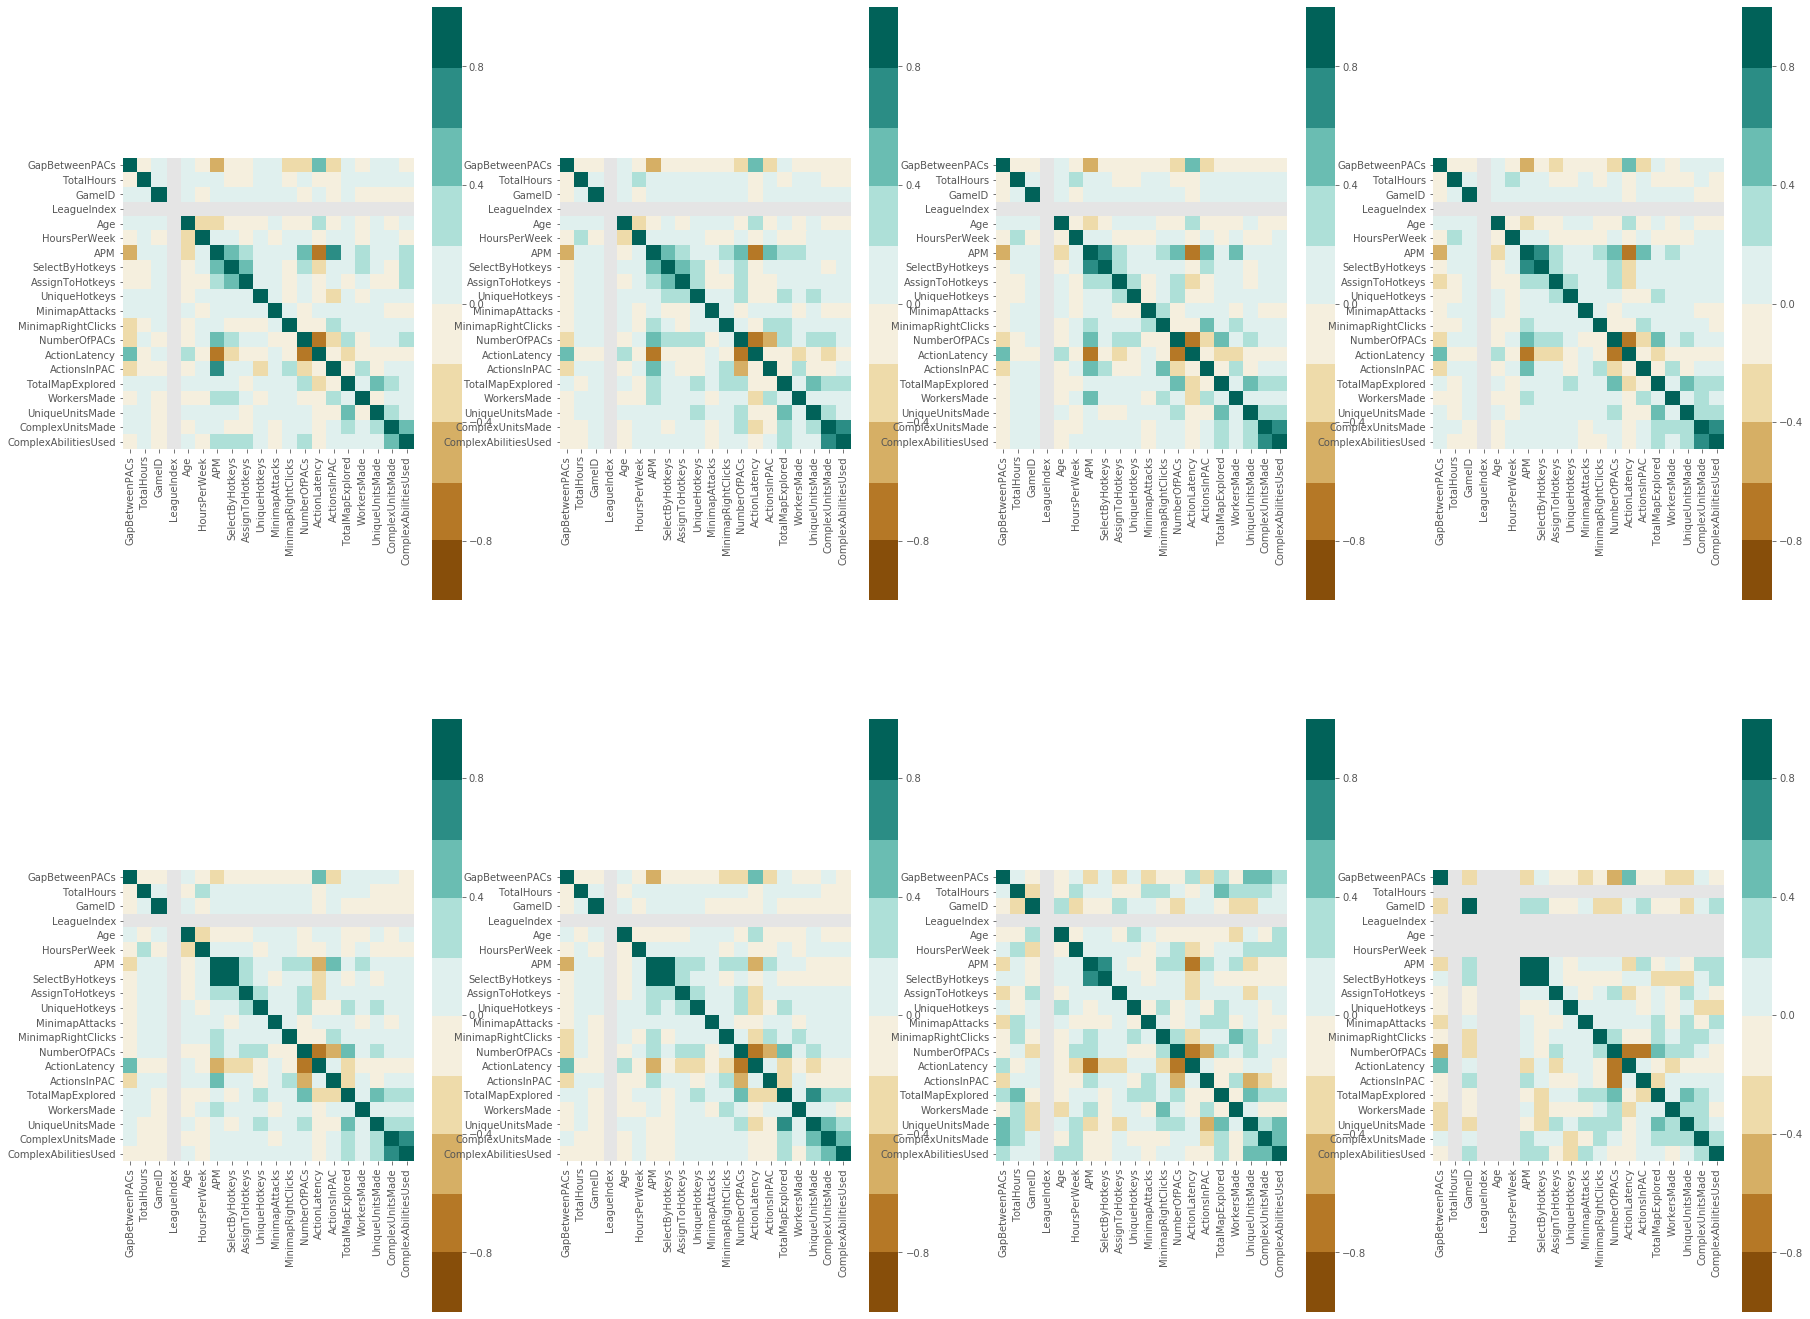

In [41]:
#Build the 8 graphs on top of one another
plt.style.use('ggplot')
plt.subplot(2,4,1)
sns.heatmap(corr_league_1, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,2)
sns.heatmap(corr_league_2, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,3)
sns.heatmap(corr_league_3, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,4)
sns.heatmap(corr_league_4, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,5)
sns.heatmap(corr_league_5, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,6)
sns.heatmap(corr_league_6, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,7)
sns.heatmap(corr_league_7, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)
plt.subplot(2,4,8)
sns.heatmap(corr_league_8, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("BrBG",10), square=True)

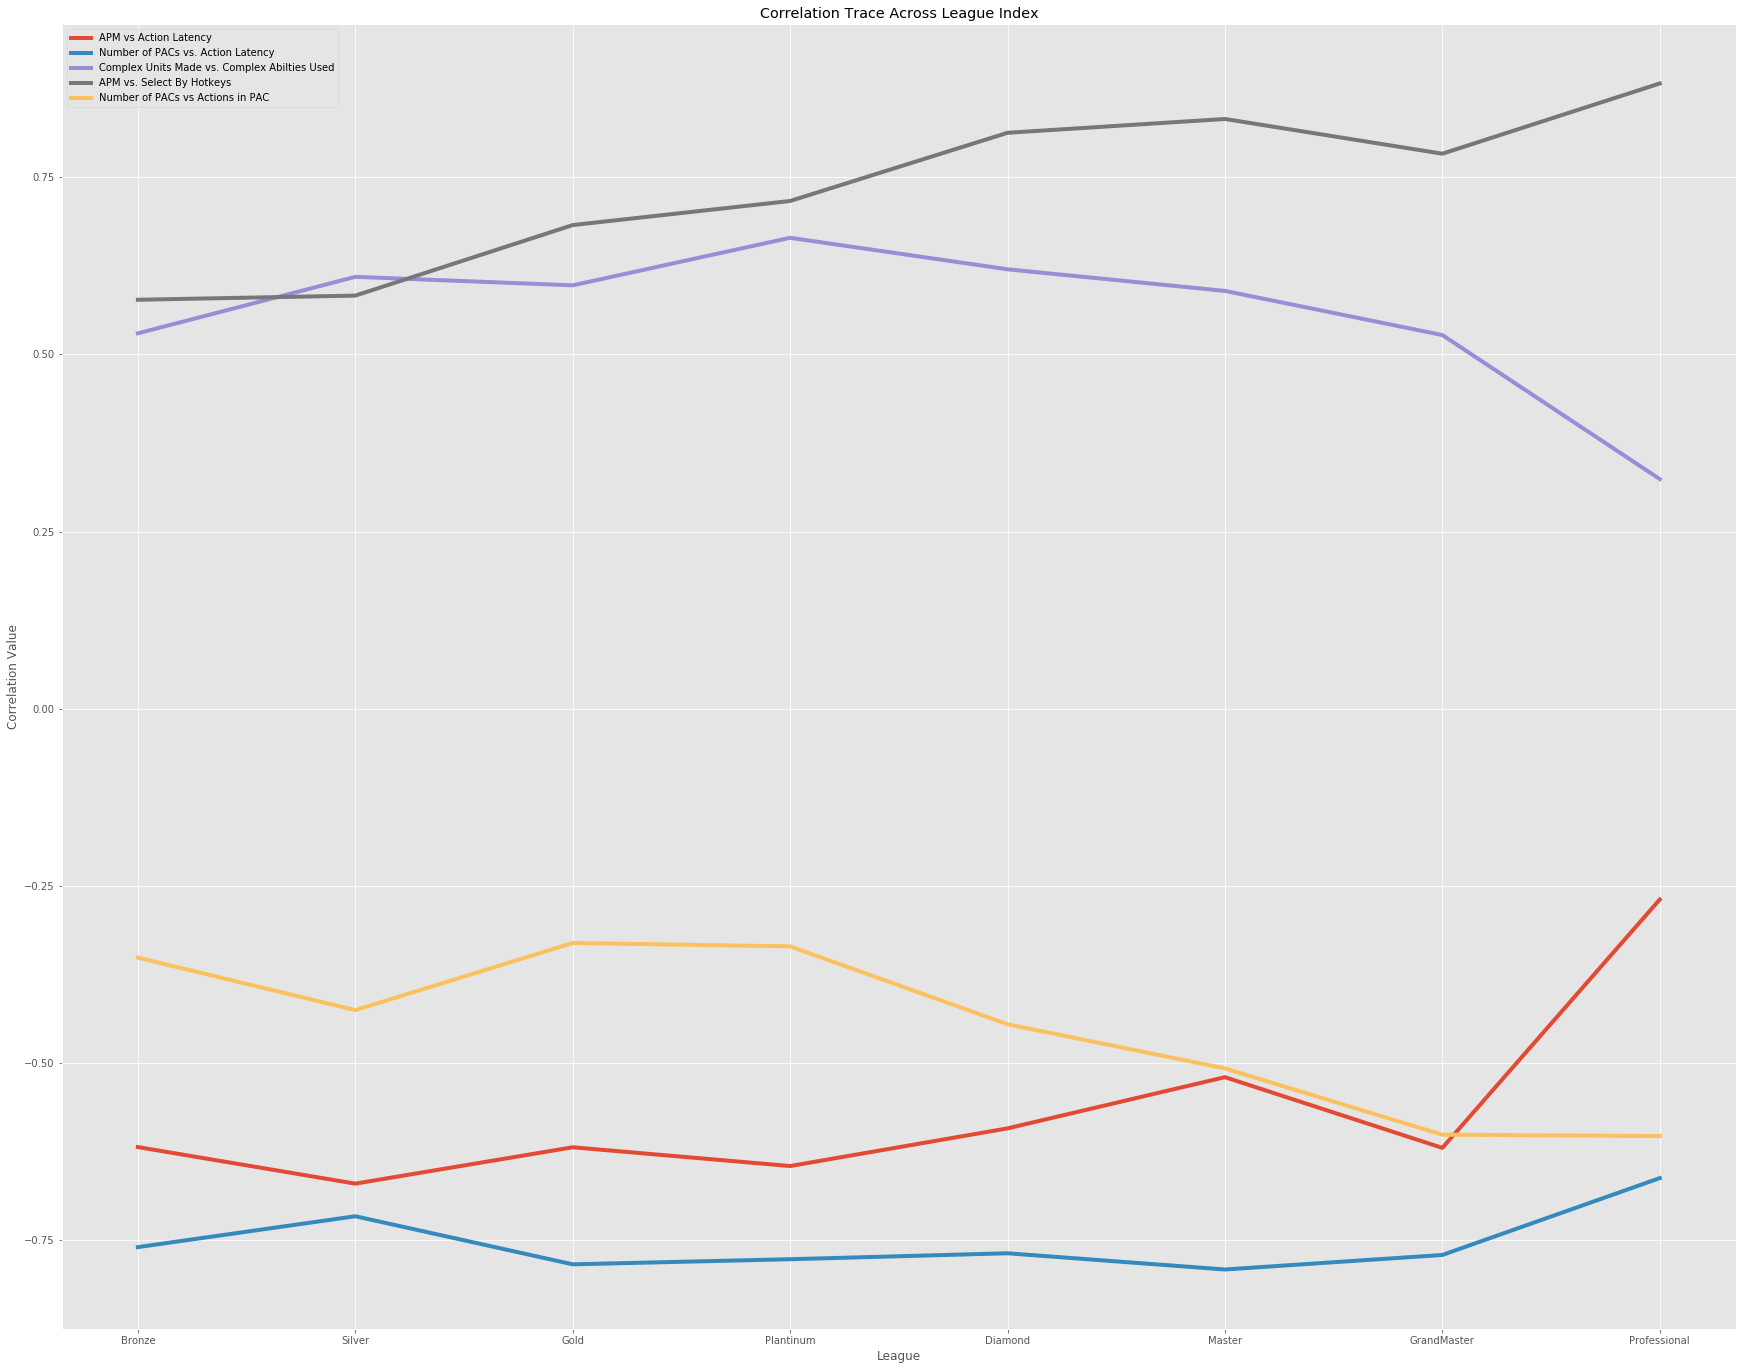

In [42]:
#create a smaller data frame from the correlations, to trace across the leagues
league_corrs = {}
league_corrs2 = pd.DataFrame([('League','APMvsAL','NumPACvsAL','ComUnitsvsComAbil','APMvsSelect','NumPACvsActPAC'),
                ('Bronze',corr_league_1.APM['ActionLatency'],corr_league_1.NumberOfPACs['ActionLatency'],
                 corr_league_1.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_1.APM['SelectByHotkeys'],
                 corr_league_1.NumberOfPACs['ActionsInPAC']),
                  ('Silver',corr_league_2.APM['ActionLatency'],corr_league_2.NumberOfPACs['ActionLatency'],
                 corr_league_2.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_2.APM['SelectByHotkeys'],
                 corr_league_2.NumberOfPACs['ActionsInPAC']),
                  ('Gold',corr_league_3.APM['ActionLatency'],corr_league_3.NumberOfPACs['ActionLatency'],
                 corr_league_3.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_3.APM['SelectByHotkeys'],
                 corr_league_3.NumberOfPACs['ActionsInPAC']),
                  ('Plantinum',corr_league_4.APM['ActionLatency'],corr_league_4.NumberOfPACs['ActionLatency'],
                 corr_league_4.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_4.APM['SelectByHotkeys'],
                 corr_league_4.NumberOfPACs['ActionsInPAC']),
                  ('Diamond',corr_league_5.APM['ActionLatency'],corr_league_5.NumberOfPACs['ActionLatency'],
                 corr_league_5.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_5.APM['SelectByHotkeys'],
                 corr_league_5.NumberOfPACs['ActionsInPAC']),
                  ('Master',corr_league_6.APM['ActionLatency'],corr_league_6.NumberOfPACs['ActionLatency'],
                 corr_league_6.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_6.APM['SelectByHotkeys'],
                 corr_league_6.NumberOfPACs['ActionsInPAC']),
                  ('GrandMaster',corr_league_7.APM['ActionLatency'],corr_league_7.NumberOfPACs['ActionLatency'],
                 corr_league_7.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_7.APM['SelectByHotkeys'],
                 corr_league_7.NumberOfPACs['ActionsInPAC']),
                  ('Professional',corr_league_8.APM['ActionLatency'],corr_league_8.NumberOfPACs['ActionLatency'],
                 corr_league_8.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_8.APM['SelectByHotkeys'],
                 corr_league_8.NumberOfPACs['ActionsInPAC']          
                 )])
league_corrs['Bronze']=(corr_league_1.APM['ActionLatency'],corr_league_1.NumberOfPACs['ActionLatency'],
                 corr_league_1.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_1.APM['AssignToHotkeys'],
                 corr_league_1.NumberOfPACs['ActionsInPAC'])
league_corrs['Silver']=(corr_league_2.APM['ActionLatency'],corr_league_2.NumberOfPACs['ActionLatency'],
                 corr_league_2.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_2.APM['AssignToHotkeys'],
                 corr_league_2.NumberOfPACs['ActionsInPAC'])
league_corrs['Gold']=(corr_league_3.APM['ActionLatency'],corr_league_3.NumberOfPACs['ActionLatency'],
                 corr_league_3.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_3.APM['AssignToHotkeys'],
                 corr_league_3.NumberOfPACs['ActionsInPAC'])
league_corrs['Platinum']=(corr_league_4.APM['ActionLatency'],corr_league_4.NumberOfPACs['ActionLatency'],
                 corr_league_4.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_4.APM['AssignToHotkeys'],
                 corr_league_4.NumberOfPACs['ActionsInPAC'])
league_corrs['Diamond']=(corr_league_5.APM['ActionLatency'],corr_league_5.NumberOfPACs['ActionLatency'],
                 corr_league_5.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_5.APM['AssignToHotkeys'],
                 corr_league_5.NumberOfPACs['ActionsInPAC'])
league_corrs['Master']=(corr_league_6.APM['ActionLatency'],corr_league_6.NumberOfPACs['ActionLatency'],
                 corr_league_6.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_6.APM['AssignToHotkeys'],
                 corr_league_6.NumberOfPACs['ActionsInPAC'])
league_corrs['GrandMaster']=(corr_league_7.APM['ActionLatency'],corr_league_7.NumberOfPACs['ActionLatency'],
                 corr_league_7.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_7.APM['AssignToHotkeys'],
                 corr_league_7.NumberOfPACs['ActionsInPAC'])
league_corrs['Professional']=(corr_league_8.APM['ActionLatency'],corr_league_8.NumberOfPACs['ActionLatency'],
                 corr_league_8.ComplexUnitsMade['ComplexAbilitiesUsed'], corr_league_8.APM['AssignToHotkeys'],
                 corr_league_8.NumberOfPACs['ActionsInPAC'])
league_corrs1 = pd.DataFrame.from_dict(league_corrs, orient='index')
league_corrs1

league_corrs2.columns = league_corrs2.iloc[0]
league_corrs2 = league_corrs2.iloc[pd.RangeIndex(len(league_corrs2)).drop(0)]
league_corrs2
plt.plot(league_corrs2.League, league_corrs2.APMvsAL, label='APM vs Action Latency', linewidth = 4)
plt.plot(league_corrs2.League, league_corrs2.NumPACvsAL, label = 'Number of PACs vs. Action Latency', linewidth = 4)
plt.plot(league_corrs2.League, league_corrs2.ComUnitsvsComAbil, label = 'Complex Units Made vs. Complex Abilties Used', linewidth = 4)
plt.plot(league_corrs2.League, league_corrs2.APMvsSelect, label = 'APM vs. Select By Hotkeys', linewidth = 4)
plt.plot(league_corrs2.League, league_corrs2.NumPACvsActPAC, label = 'Number of PACs vs Actions in PAC', linewidth = 4)
plt.xlabel('League')
plt.ylabel('Correlation Value')
plt.title('Correlation Trace Across League Index')
plt.legend()

In [43]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## Investigating League Index in particular

#### Histogram of League Index

In [83]:
#create dictionary of league names
league_names = {1:'Bronze',2:'Silver',3:'Gold',4:'Platinum',5:'Diamond',6:'Master',7:'GM',8:'Pro'}
league_names = pd.DataFrame.from_dict(league_names, orient='index').reset_index()
league_names.columns=['LeagueIndex','LeagueIndex2']

base2_2 = pd.merge(base2, league_names, on='LeagueIndex')
base3_2 = pd.merge(base3, league_names, on='LeagueIndex')

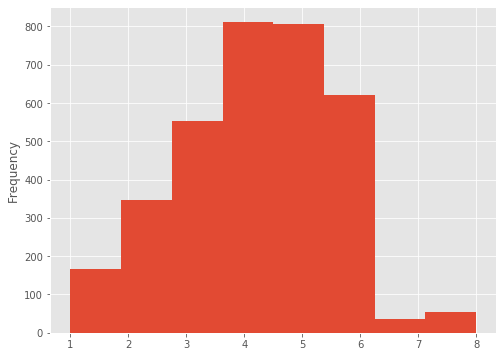

In [44]:
base['LeagueIndex'].plot(kind='hist', bins=8)

#### Histogram of League Index without GM and Pro level

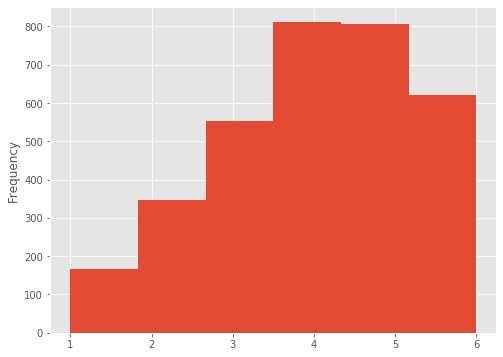

In [45]:
base_test = base[base['LeagueIndex']<7]
base_test['LeagueIndex'].plot(kind='hist',bins=6)

#### Scatter plots with League Index on base

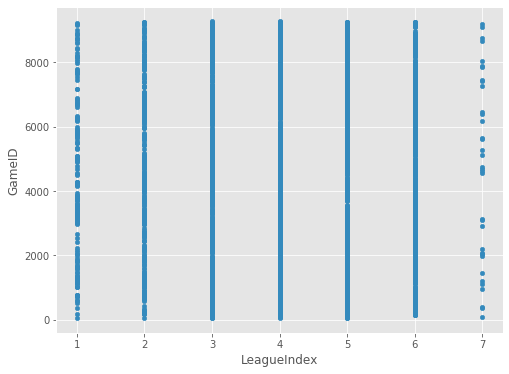

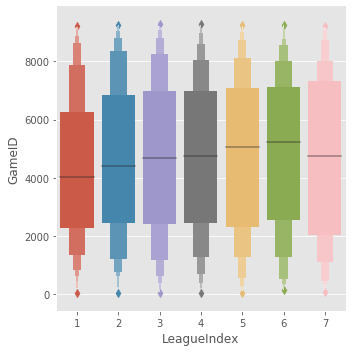

In [46]:
base2.plot(kind='scatter', x='LeagueIndex', y='GameID')
sns.catplot(x='LeagueIndex', y='GameID', data=base2, kind='boxen')

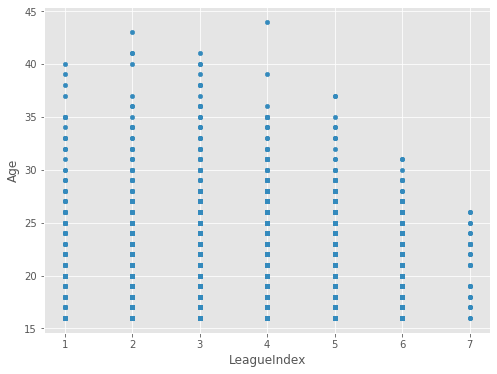

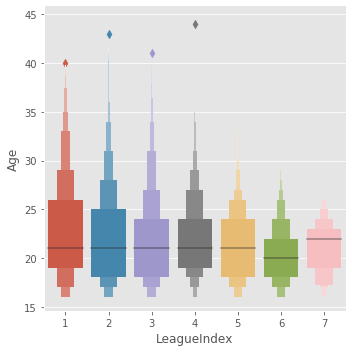

In [47]:
base2.plot(kind='scatter', x='LeagueIndex', y='Age')
sns.catplot(x='LeagueIndex', y='Age', data=base2, kind='boxen')

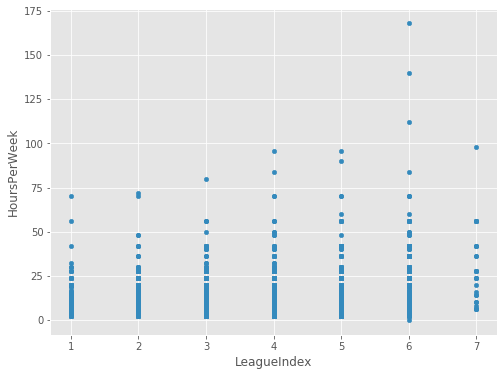

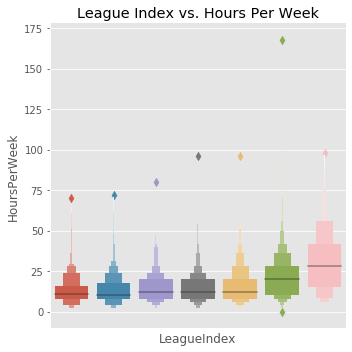

In [86]:
base2.plot(kind='scatter', x='LeagueIndex', y='HoursPerWeek')
_4=sns.catplot(x='LeagueIndex', y='HoursPerWeek', data=base2_2, kind='boxen')
_4 = plt.title('League Index vs. Hours Per Week')
_4 = plt.xticks([])

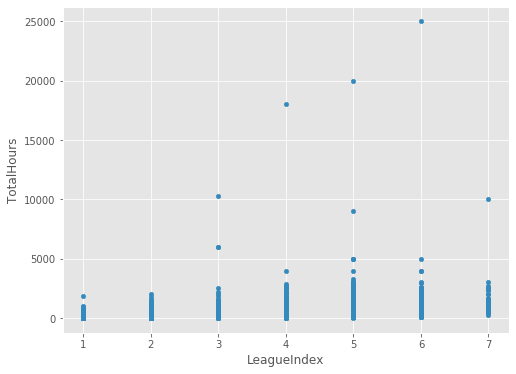

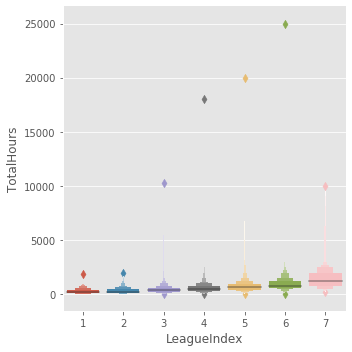

In [49]:
base2.plot(kind='scatter', x='LeagueIndex', y='TotalHours')
sns.catplot(x='LeagueIndex', y='TotalHours', data=base2, kind='boxen')

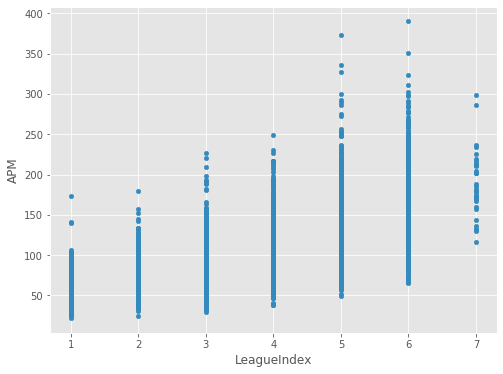

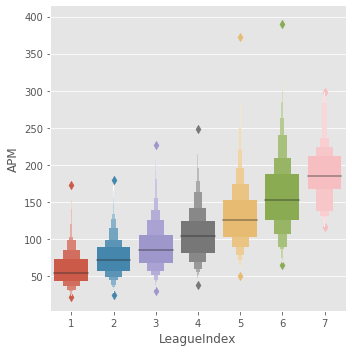

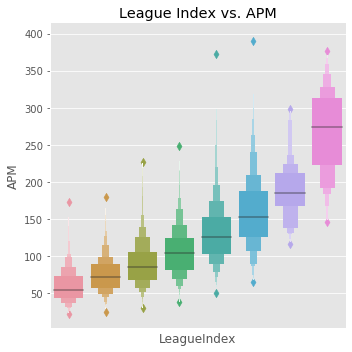

In [87]:
base2.plot(kind='scatter', x='LeagueIndex', y='APM')
sns.catplot(x='LeagueIndex', y='APM', data=base2, kind='boxen')
_2=sns.catplot(x='LeagueIndex', y='APM', data=base3, kind='boxen')
_2=plt.title('League Index vs. APM')
_2 = plt.xticks([])

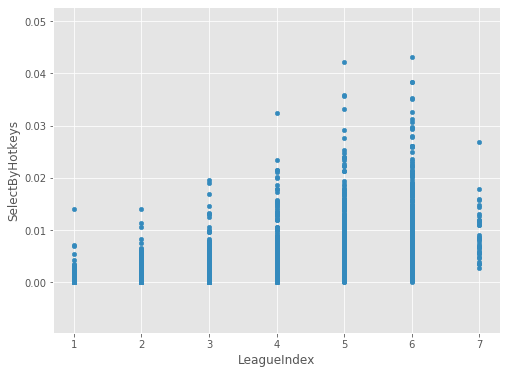

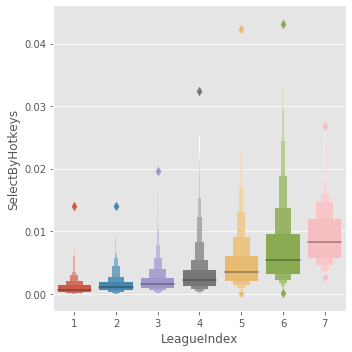

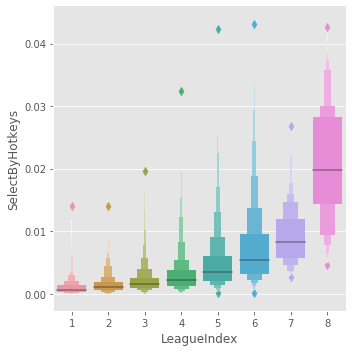

In [51]:
base2.plot(kind='scatter', x='LeagueIndex', y='SelectByHotkeys')
sns.catplot(x='LeagueIndex', y='SelectByHotkeys', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='SelectByHotkeys', data=base3, kind='boxen')

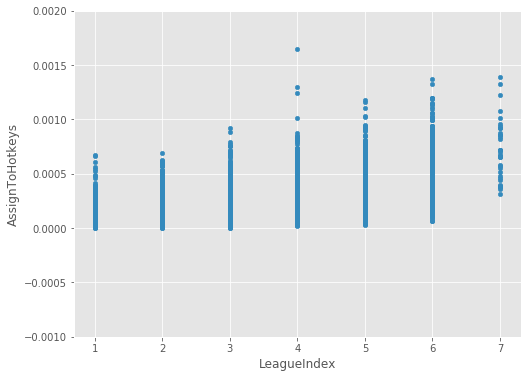

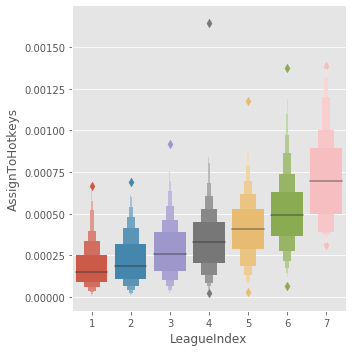

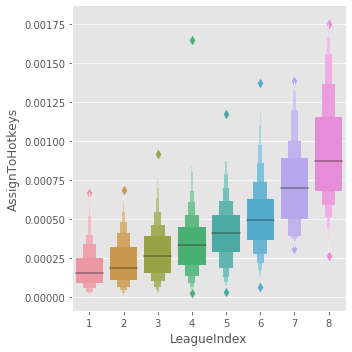

In [52]:
base2.plot(kind='scatter', x='LeagueIndex', y='AssignToHotkeys',
          ylim = (-0.001,0.002))
sns.catplot(x='LeagueIndex', y='AssignToHotkeys', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='AssignToHotkeys', data=base3, kind='boxen')

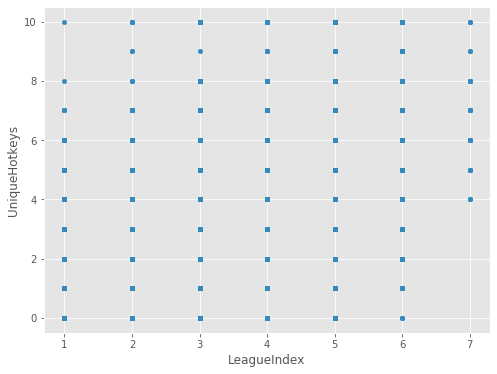

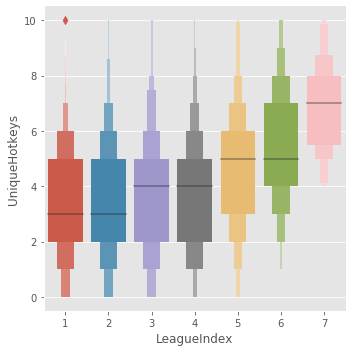

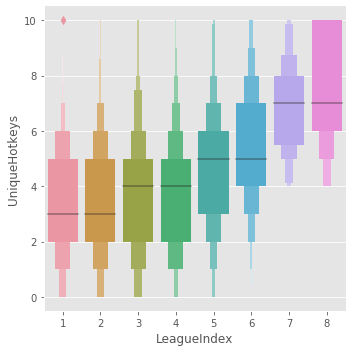

In [53]:
base2.plot(kind='scatter', x='LeagueIndex', y='UniqueHotkeys')
sns.catplot(x='LeagueIndex', y='UniqueHotkeys', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='UniqueHotkeys', data=base3, kind='boxen')

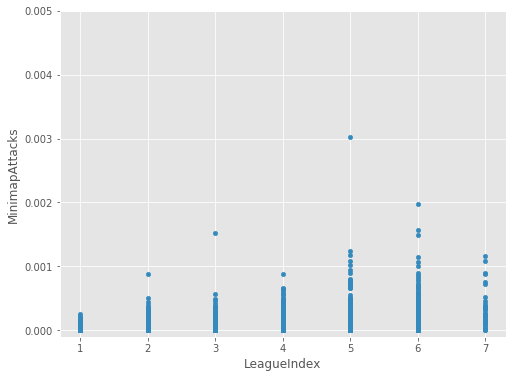

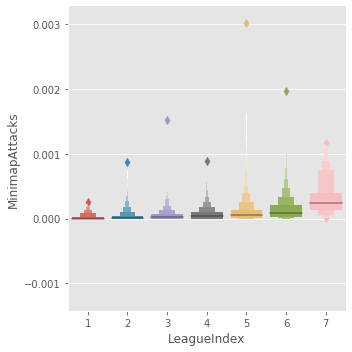

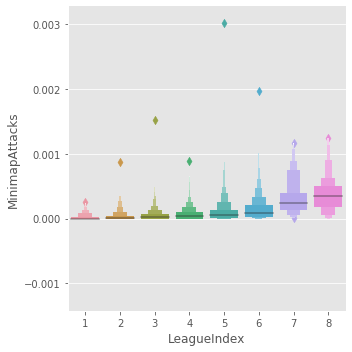

In [54]:
base2.plot(kind='scatter', x='LeagueIndex', y='MinimapAttacks',
          ylim = (-0.0001,0.005))
sns.catplot(x='LeagueIndex', y='MinimapAttacks', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='MinimapAttacks', data=base3, kind='boxen')

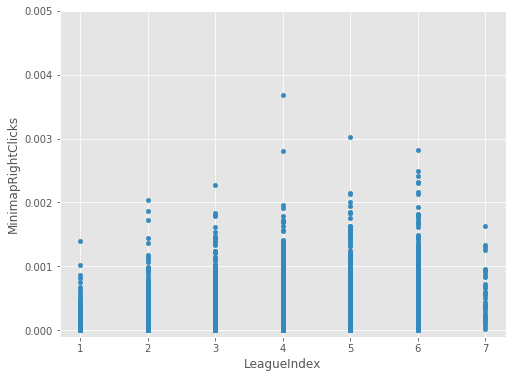

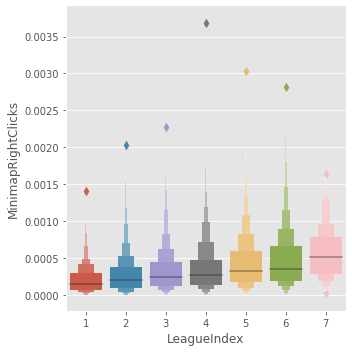

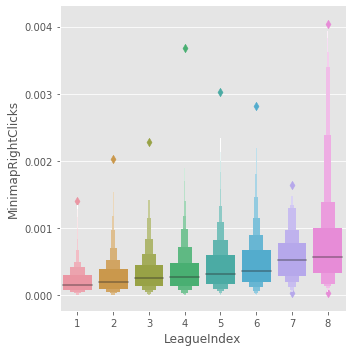

In [55]:
base2.plot(kind='scatter', x='LeagueIndex', y='MinimapRightClicks',
          ylim = (-0.0001,0.005))
sns.catplot(x='LeagueIndex', y='MinimapRightClicks', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='MinimapRightClicks', data=base3, kind='boxen')

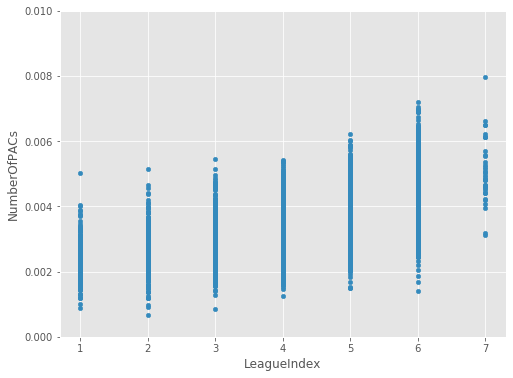

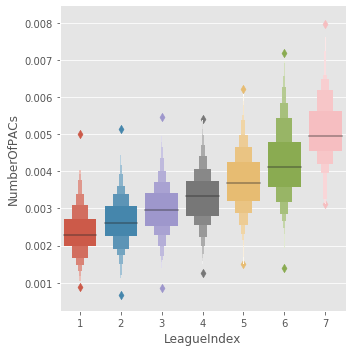

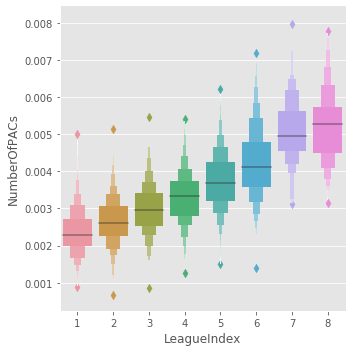

In [56]:
base2.plot(kind='scatter', x='LeagueIndex', y='NumberOfPACs',
          ylim=(0,0.01))
sns.catplot(x='LeagueIndex', y='NumberOfPACs', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='NumberOfPACs', data=base3, kind='boxen')

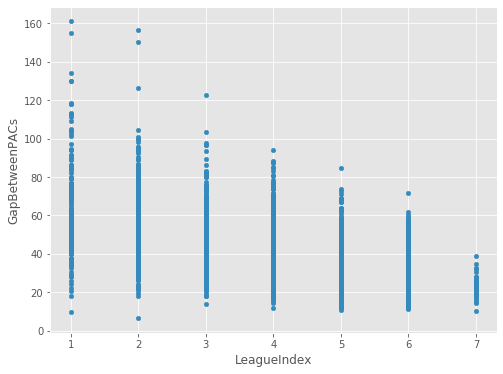

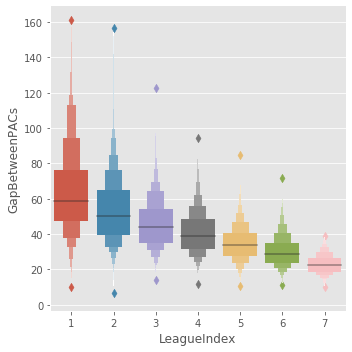

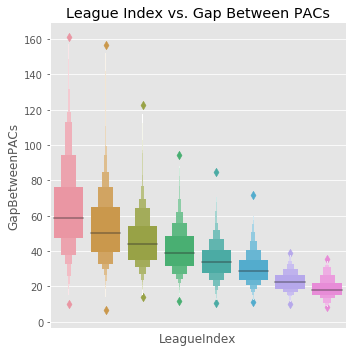

In [88]:
base2.plot(kind='scatter', x='LeagueIndex', y='GapBetweenPACs')
sns.catplot(x='LeagueIndex', y='GapBetweenPACs', data=base2, kind='boxen')
_=sns.catplot(x='LeagueIndex', y='GapBetweenPACs', data=base3, kind='boxen')
_=plt.title('League Index vs. Gap Between PACs')
_=plt.xticks([])

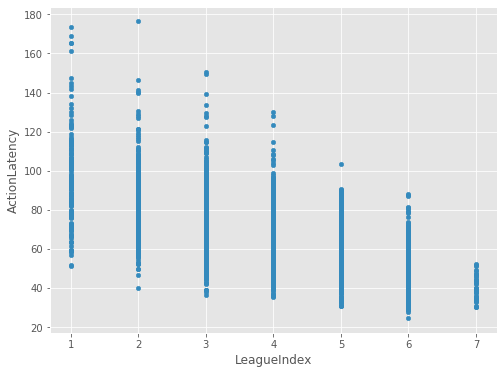

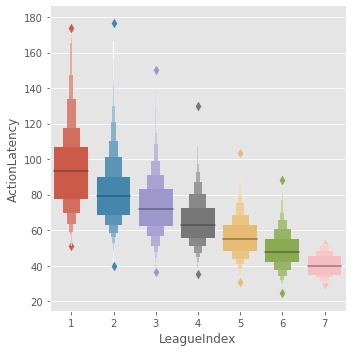

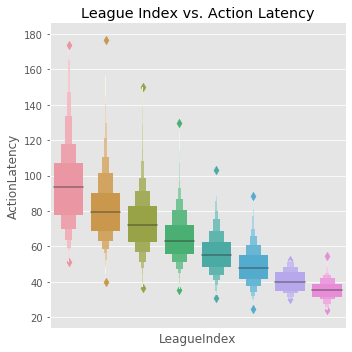

In [89]:
base2.plot(kind='scatter', x='LeagueIndex', y='ActionLatency')
sns.catplot(x='LeagueIndex', y='ActionLatency', data=base2, kind='boxen')
_1 =sns.catplot(x='LeagueIndex', y='ActionLatency', data=base3, kind='boxen')
_1 = plt.title('League Index vs. Action Latency')
_1 = plt.xticks([])

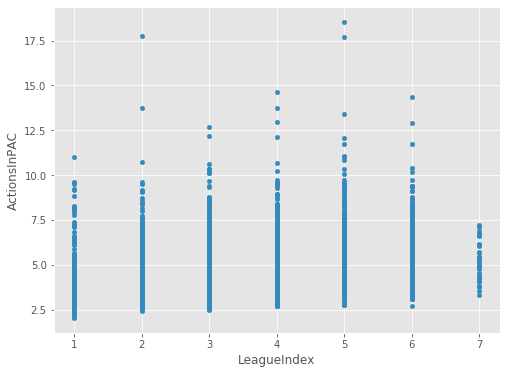

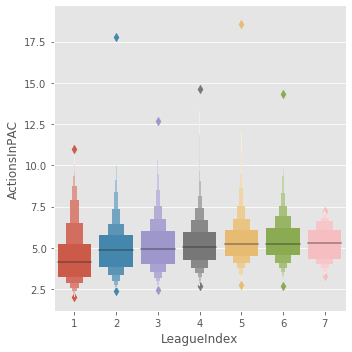

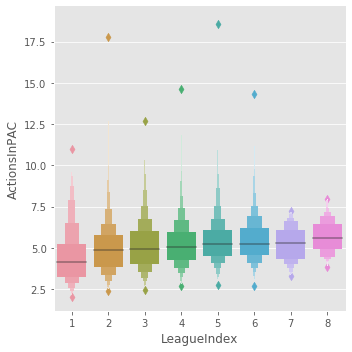

In [59]:
base2.plot(kind='scatter', x='LeagueIndex', y='ActionsInPAC')
sns.catplot(x='LeagueIndex', y='ActionsInPAC', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='ActionsInPAC', data=base3, kind='boxen')

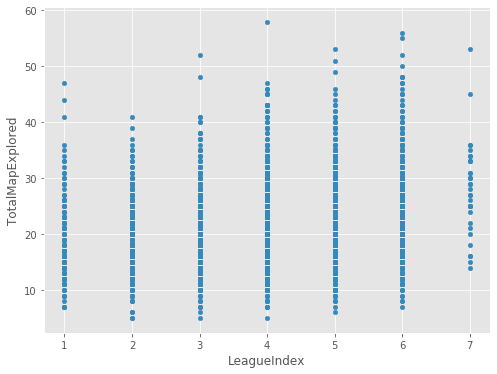

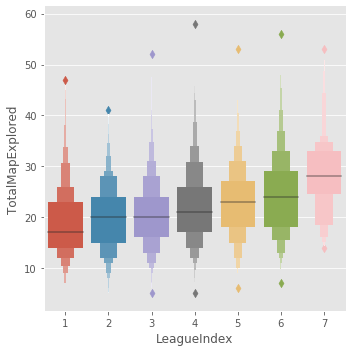

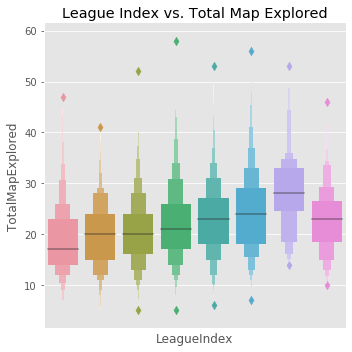

In [90]:
base2.plot(kind='scatter', x='LeagueIndex', y='TotalMapExplored')
sns.catplot(x='LeagueIndex', y='TotalMapExplored', data=base2, kind='boxen')
_3=sns.catplot(x='LeagueIndex', y='TotalMapExplored', data=base3, kind='boxen')
_3=plt.title('League Index vs. Total Map Explored')
_3 = plt.xticks([])

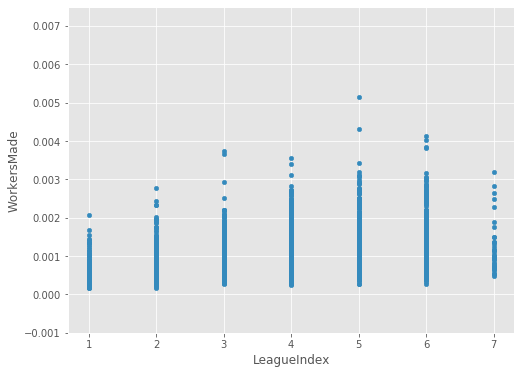

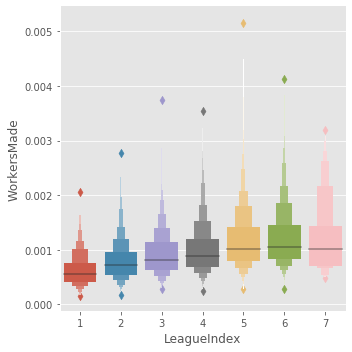

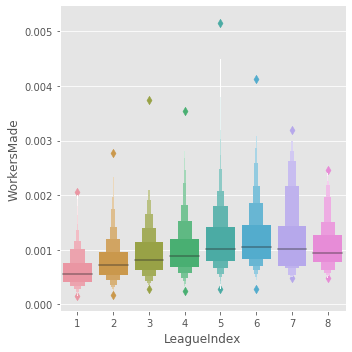

In [61]:
base2.plot(kind='scatter', x='LeagueIndex', y='WorkersMade',
          ylim = (-0.001,0.0075))
sns.catplot(x='LeagueIndex', y='WorkersMade', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='WorkersMade', data=base3, kind='boxen')

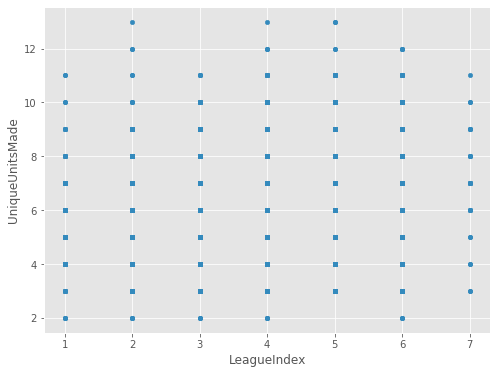

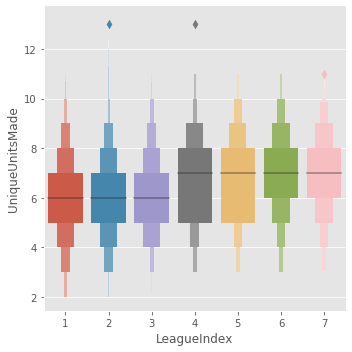

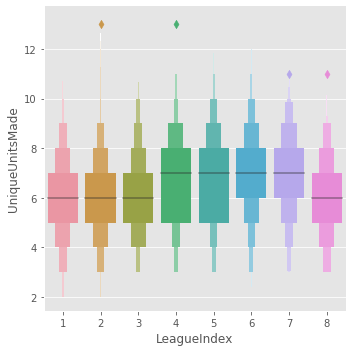

In [62]:
base2.plot(kind='scatter', x='LeagueIndex', y='UniqueUnitsMade')
sns.catplot(x='LeagueIndex', y='UniqueUnitsMade', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='UniqueUnitsMade', data=base3, kind='boxen')

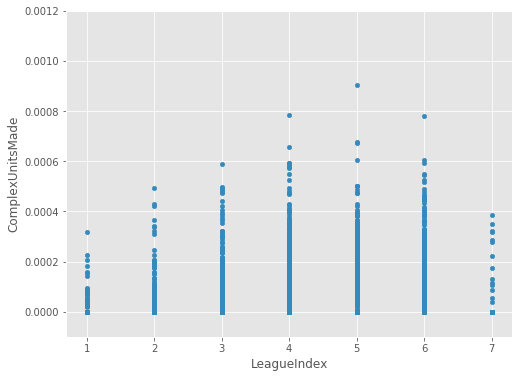

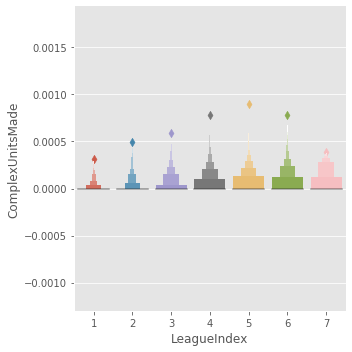

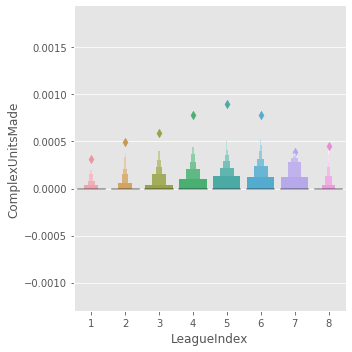

In [63]:
base2.plot(kind='scatter', x='LeagueIndex', y='ComplexUnitsMade',
          ylim = (-0.0001,0.0012))
sns.catplot(x='LeagueIndex', y='ComplexUnitsMade', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='ComplexUnitsMade', data=base3, kind='boxen')

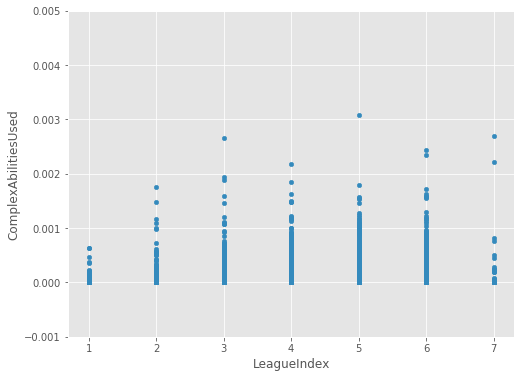

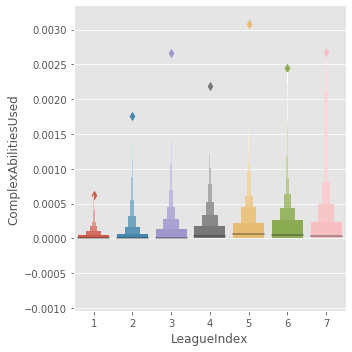

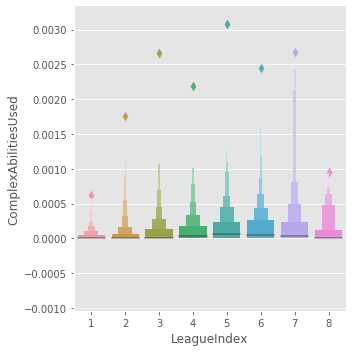

In [64]:
base2.plot(kind='scatter', x='LeagueIndex', y='ComplexAbilitiesUsed',
          ylim = (-0.001,0.005))
sns.catplot(x='LeagueIndex', y='ComplexAbilitiesUsed', data=base2, kind='boxen')
sns.catplot(x='LeagueIndex', y='ComplexAbilitiesUsed', data=base3, kind='boxen')